# Cogs 108: Data Wrangling

In [1]:
# Import standard libraries
%matplotlib inline
import pandas as pd
import numpy as np

# Files

In [2]:
%ls

Motor_Vehicle_Crashes_-_Case_Information__Three_Year_Window.csv
Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv
cogs108_notebook.ipynb


# Reading Vehicle Information into DataFrame

In [3]:
vehicle_info =  pd.read_csv('Motor_Vehicle_Crashes_-_Vehicle_Information__Three_Year_Window.csv')

In [4]:
vehicle_info.shape

(1048575, 19)

In [16]:
vehicle_info.head()

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364180,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2015.0,NY,2.0,4.0,NISSA,HUMAN,Fell Asleep,HUMAN,Unknown,Not Applicable,KNMAT2MV1FP544486
1,2016,13364181,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Merging,Not Entered,South,Gas,2007.0,NY,1.0,4.0,HYUND,HUMAN,Alcohol Involvement,HUMAN,Not Applicable,Not Entered,5NPET46C87H227617
2,2016,13364182,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2009.0,NY,1.0,4.0,HONDA,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Entered,1HGCP26379A133398
3,2016,13364283,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,DODGE,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1B3HB28B37D582730
4,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108


# Vehicle Body Types

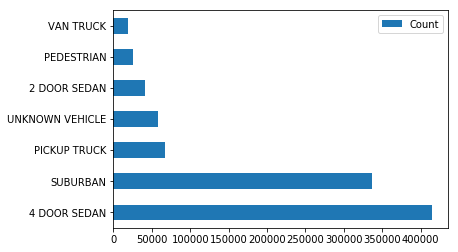

In [6]:
body_types = pd.DataFrame(vehicle_info['Vehicle Body Type'].value_counts())

body_types.columns = ['Count']

one_percent = sum(body_types['Count']) * 0.01 # Only include those within 1% of total # of cars...

body_types[body_types['Count'] > one_percent].plot.barh(rot=0, width=0.5)

# Vehicle Year

Find the unique values of the years (sorted) and print them out.

In [7]:
np.sort(vehicle_info['Vehicle Year'].unique())

array([1900., 1901., 1905., 1906., 1907., 1908., 1909., 1910., 1911.,
       1914., 1915., 1916., 1919., 1920., 1923., 1929., 1930., 1932.,
       1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 1946.,
       1947., 1948., 1950., 1951., 1952., 1953., 1954., 1955., 1956.,
       1957., 1958., 1959., 1960., 1961., 1962., 1963., 1964., 1965.,
       1966., 1967., 1968., 1969., 1970., 1971., 1972., 1973., 1974.,
       1975., 1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983.,
       1984., 1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992.,
       1993., 1994., 1995., 1996., 1997., 1998., 1999., 2000., 2001.,
       2002., 2003., 2004., 2005., 2006., 2007., 2008., 2009., 2010.,
       2011., 2012., 2013., 2014., 2015., 2016., 2017.,   nan])

In [8]:
vehicle_year = pd.DataFrame(vehicle_info['Vehicle Year'].value_counts())
vehicle_year.columns = ['Count']
sum(vehicle_year['Count'])

894491

In [9]:
vehicle_year.head(10)

,Count
2014.0,79922
2015.0,76439
2013.0,70350
2012.0,59586
2008.0,52115
2011.0,51652
2007.0,51364
2005.0,48364
2006.0,48138
2010.0,47576


1900.0

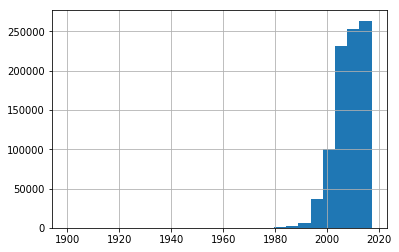

In [10]:
vehicle_info['Vehicle Year'].hist(bins=25)
min(vehicle_info['Vehicle Year'])

# Vehcile Make

In [38]:
vehicle_make = pd.DataFrame(vehicle_info['Vehicle Make'].value_counts())
vehicle_make.columns = ['Count']
vehicle_make.head(10)

,Count
TOYOT,105479
FORD,96574
HONDA,92601
CHEVR,87765
NISSA,68393
JEEP,38476
HYUND,36758
DODGE,36590
SUBAR,23618
BMW,18055


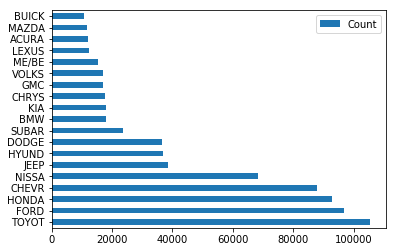

In [39]:
vehicle_make[vehicle_make['Count'] > 10000].plot.barh(rot=0, width=0.5)

# Event Type

In [44]:
event_type = pd.DataFrame(vehicle_info['Event Type'].value_counts())
event_type.columns = ['Count']
event_type.head(10)

,Count
Not Applicable,590685
Not Entered,328586
"Other Motor Vehicle, Collision With",54865
"Tree, Collision With Fixed Object",6049
"Earth Embankment/Rock Cut/Ditch, Collision With Fixed Object",5085
"Guide Rail - Not At End, Collision With Fixed Object",4772
"Light Support/Utility Pole, Collision With Fixed Object",4565
Unknown,4194
"Overturned, Non-Collision",4104
"Pedestrian, Collision With",3112


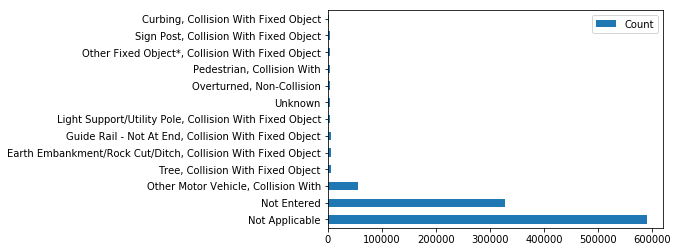

In [51]:
event_type[event_type['Count'] > 2000].plot.barh(rot=0, width=0.5)

# Number of Occupants

In [25]:
num_occupants = pd.DataFrame(vehicle_info['Number of Occupants'].value_counts())
num_occupants.columns = ['Count']
num_occupants.head(10)

,Count
1.0,672163
2.0,158331
3.0,44557
0.0,37616
4.0,18855
5.0,6743
6.0,1951
7.0,813
8.0,364
9.0,214


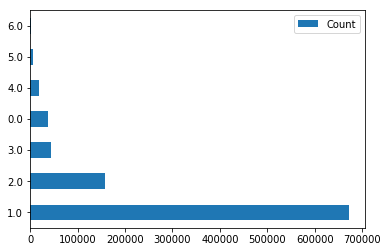

In [31]:
num_occupants[num_occupants['Count'] > 1000].plot.barh(rot=0, width=0.5)

# Action Prior to Accident

In [59]:
prior_action = pd.DataFrame(vehicle_info['Action Prior to Accident'].value_counts())
prior_action.columns = ['Count']
prior_action.head(10)

,Count
Going Straight Ahead,490775
Stopped in Traffic,86893
Making Left Turn,80188
Slowing or Stopping,79048
Parked,68806
Unknown,67521
Making Right Turn,34154
Backing,32659
Not Applicable,26821
Changing Lanes,23830


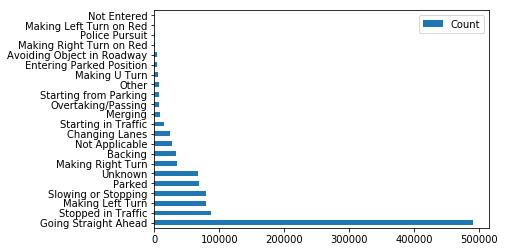

In [60]:
prior_action.plot.barh(rot=0, width=0.5)

# -------------------------------------------------------

# Reading Case Information into DataFrame

In [11]:
case_info = pd.read_csv('Motor_Vehicle_Crashes_-_Case_Information__Three_Year_Window.csv')

In [12]:
case_info.shape

(895916, 18)

In [13]:
case_info.head()

,Year,Crash Descriptor,Time,Date,Day of Week,Police Report,Lighting Conditions,Municipality,Collision Type Descriptor,County Name,Road Descriptor,Weather Conditions,Traffic Control Device,Road Surface Conditions,DOT Reference Marker Location,Pedestrian Bicyclist Action,Event Descriptor,Number of Vehicles Involved
0,2016,Property Damage Accident,17:14,12/31/2016,Saturday,Y,Dark-Road Unlighted,MARTINSBURG,OTHER,LEWIS,Curve and Grade,Cloudy,None,Wet,26 74061244,Not Applicable,Deer,1
1,2016,Property Damage Accident,5:30,12/31/2016,Saturday,Y,Dark-Road Unlighted,BROOKHAVEN,SIDESWIPE,SUFFOLK,Straight and Level,Clear,None,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
2,2016,Property Damage & Injury Accident,11:02,12/31/2016,Saturday,Y,Daylight,MILFORD,LEFT TURN (3),OTSEGO,Straight and Level,Cloudy,No Passing Zone,Wet,7 94033029,Not Applicable,"Other Motor Vehicle, Collision With",2
3,2016,Injury Accident,15:20,12/31/2016,Saturday,N,Unknown,KINGS,Unknown,KINGS,Unknown,Unknown,Unknown,Unknown,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2
4,2016,Property Damage Accident,8:52,12/31/2016,Saturday,Y,Daylight,RENSSELAER,LEFT TURN (3),RENSSELAER,Straight and Grade,Clear,Traffic Signal,Dry,NaN,Not Applicable,"Other Motor Vehicle, Collision With",2


# Year

In [74]:
accident_year2 = pd.DataFrame(case_info['Year'].value_counts())
accident_year2.columns = ['Count']
accident_year2

,Count
2016,301908
2014,299452
2015,294556


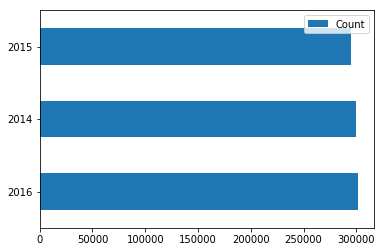

In [75]:
accident_year2.plot.barh(rot=0, width=0.5)

# Day of Week

In [62]:
day_week = pd.DataFrame(case_info['Day of Week'].value_counts())
day_week.columns = ['Count']
day_week

,Count
Friday,147681
Thursday,135332
Wednesday,132954
Tuesday,131951
Monday,128593
Saturday,118697
Sunday,100708


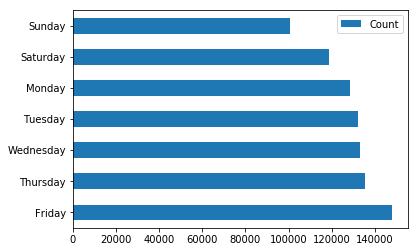

In [63]:
day_week.plot.barh(rot=0, width=0.5)

# Lighting Conditions

In [65]:
light_conditions = pd.DataFrame(case_info['Lighting Conditions'].value_counts())
light_conditions.columns = ['Count']
light_conditions

,Count
Daylight,547758
Dark-Road Lighted,149508
Dark-Road Unlighted,86721
Unknown,67701
Dusk,26051
Dawn,18177


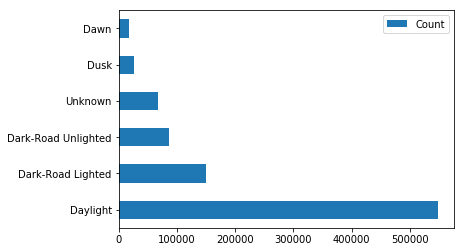

In [66]:
light_conditions.plot.barh(rot=0, width=0.5)

# Traffic Control Device

In [69]:
traffic_control = pd.DataFrame(case_info['Traffic Control Device'].value_counts())
traffic_control.columns = ['Count']
traffic_control.head(10)

,Count
None,474065
Traffic Signal,187593
Unknown,80019
Stop Sign,74406
No Passing Zone,54461
Other,8209
Yield Sign,6976
Construction Work Area,3236
Flashing Light,2113
Not Applicable,1041


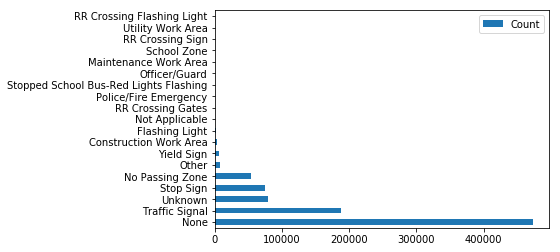

In [70]:
traffic_control.plot.barh(rot=0, width=0.5)

# Road Surface Conditions

In [72]:
road_conditions = pd.DataFrame(case_info['Road Surface Conditions'].value_counts())
road_conditions.columns = ['Count']
road_conditions

,Count
Dry,616741
Wet,129215
Snow/Ice,76589
Unknown,66593
Slush,4843
Other,1140
Muddy,508
Flooded Water,287


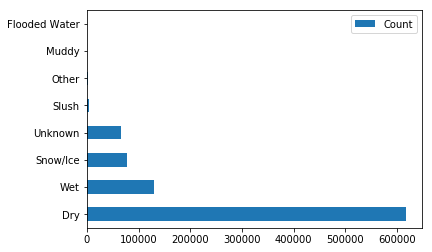

In [73]:
road_conditions.plot.barh(rot=0, width=0.5)